## Importing Librarires

In [769]:
## importing librarirs.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

import plotly_express as px
from pandas.plotting import autocorrelation_plot
from math import sqrt

from sklearn import preprocessing
import statsmodels.api as sm
from sklearn import preprocessing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

## Importing the dataset.

In [770]:
worldwide_cases=pd.read_csv(r"C:\Users\Rushab\Documents\Hands on Python new\Kaggle Datasets and sites\Monkey_pox_data\Monkey_Pox_Cases_Worldwide.csv")
detected_cases=pd.read_csv(r"C:\Users\Rushab\Documents\Hands on Python new\Kaggle Datasets and sites\Monkey_pox_data\Worldwide_Case_Detection_Timeline.csv")
confirmed_daily_cases=pd.read_csv(r"C:\Users\Rushab\Documents\Hands on Python new\Kaggle Datasets and sites\Monkey_pox_data\Daily_Country_Wise_Confirmed_Cases.csv")

## Reading the dataset.

In [771]:
## reading the dataframe "worlwide_cases" to analize and understand the data.
worldwide_cases.head(10)

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
0,England,1482.0,0.0,5.0,2.0,7.0
1,Portugal,433.0,0.0,0.0,0.0,34.0
2,Spain,1258.0,0.0,11.0,2.0,0.0
3,United States,700.0,0.0,4.0,22.0,4.0
4,Canada,370.0,9.0,1.0,2.0,0.0
5,Sweden,43.0,0.0,0.0,0.0,0.0
6,Italy,255.0,1.0,18.0,19.0,4.0
7,France,721.0,1.0,1.0,2.0,1.0
8,Belgium,168.0,1.0,2.0,1.0,0.0
9,Australia,20.0,0.0,2.0,8.0,0.0


In [772]:
## Checking the number of rows and columns.
worldwide_cases.shape

(85, 6)

In [773]:
## Checking the datatype of the attributes in the "worlwide_cases" dataframe.
worldwide_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             85 non-null     object 
 1   Confirmed_Cases     85 non-null     float64
 2   Suspected_Cases     85 non-null     float64
 3   Hospitalized        85 non-null     float64
 4   Travel_History_Yes  85 non-null     float64
 5   Travel_History_No   85 non-null     float64
dtypes: float64(5), object(1)
memory usage: 4.1+ KB


#### Inference:-

- From the above analysis we can observe the datatypes in the various attributes and also conclude that there are no null values in the dataset.

In [774]:
## reading the dataframe "detected_cases" to analize and understand the data.
detected_cases.head(50)

,Date_confirmation,Country,City,Age,Gender,Symptoms,Hospitalised (Y/N/NA),Isolated (Y/N/NA),Travel_history (Y/N/NA)
0,2022-05-06,England,London,NaN,NaN,rash,Y,Y,Y
1,2022-05-12,England,London,NaN,NaN,rash,Y,Y,N
2,2022-05-13,England,London,NaN,NaN,vesicular rash,N,Y,N
3,2022-05-15,England,London,NaN,male,vesicular rash,Y,Y,N
4,2022-05-15,England,London,NaN,male,vesicular rash,Y,Y,N
5,2022-05-15,England,London,NaN,male,vesicular rash,NaN,Y,N
6,2022-05-15,England,Newcastle,NaN,male,vesicular rash,Y,Y,Y
7,2022-05-17,Portugal,Lisbon,20-44,male,"skin lesions, ulcerative lesions",N,NaN,N
8,2022-05-17,Portugal,Lisbon,20-44,male,"skin lesions, ulcerative lesions",N,NaN,N
9,2022-05-17,Portugal,Lisbon,20-44,male,"skin lesions, ulcerative lesions",N,NaN,N


In [775]:
## Checking the number of rows and columns.
detected_cases.shape

(8129, 9)

In [776]:
## Checking the datatype of the attributes in the "detected_cases" dataframe.
detected_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8129 entries, 0 to 8128
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Date_confirmation        8129 non-null   object
 1   Country                  8129 non-null   object
 2   City                     584 non-null    object
 3   Age                      1256 non-null   object
 4   Gender                   1179 non-null   object
 5   Symptoms                 117 non-null    object
 6   Hospitalised (Y/N/NA)    169 non-null    object
 7   Isolated (Y/N/NA)        240 non-null    object
 8   Travel_history (Y/N/NA)  215 non-null    object
dtypes: object(9)
memory usage: 571.7+ KB


#### Inference:-

- From the above analysis we can observe the datatypes in the various attributes and also conclude that there are several null values in the dataset.

In [777]:
## reading the dataframe confirmed_daily_cases" to analize and understand the data.
confirmed_daily_cases.head(10)

,Country,2022-05-06,2022-05-12,2022-05-13,2022-05-15,2022-05-17,2022-05-18,2022-05-19,2022-05-20,2022-05-21,...,2022-06-29,2022-06-30,2022-07-01,2022-07-02,2022-07-03,2022-07-04,2022-07-05,2022-07-06,2022-07-07,2022-07-08
0,England,1,1,1,4,0,2,0,11,0,...,0,150,0,0,0,100,0,0,197,0
1,Portugal,0,0,0,0,3,11,9,0,0,...,18,11,18,0,0,0,13,0,0,0
2,Spain,0,0,0,0,0,7,0,23,10,...,0,396,0,0,0,62,0,0,0,0
3,United States,0,0,0,0,0,1,0,1,0,...,45,44,64,0,0,0,100,45,96,0
4,Germany,0,0,0,0,0,0,1,1,2,...,35,64,105,1,7,97,75,96,54,128
5,Belgium,0,0,0,0,0,0,1,2,1,...,0,0,0,0,0,0,51,0,0,0
6,Sweden,0,0,0,0,0,0,1,0,0,...,0,15,0,0,0,0,0,15,0,0
7,Italy,0,0,0,0,0,0,1,2,0,...,0,0,33,0,0,0,41,0,0,22
8,Canada,0,0,0,0,0,0,2,3,0,...,12,0,0,25,0,37,0,21,0,0
9,France,0,0,0,0,0,0,1,0,0,...,0,58,0,0,0,0,79,0,144,0


In [778]:
## Checking the number of rows and columns.
confirmed_daily_cases.shape

(61, 56)

In [779]:
## Checking the datatype of the attributes in the "detected_cases" dataframe.
confirmed_daily_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 56 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Country     61 non-null     object
 1   2022-05-06  61 non-null     int64 
 2   2022-05-12  61 non-null     int64 
 3   2022-05-13  61 non-null     int64 
 4   2022-05-15  61 non-null     int64 
 5   2022-05-17  61 non-null     int64 
 6   2022-05-18  61 non-null     int64 
 7   2022-05-19  61 non-null     int64 
 8   2022-05-20  61 non-null     int64 
 9   2022-05-21  61 non-null     int64 
 10  2022-05-23  61 non-null     int64 
 11  2022-05-24  61 non-null     int64 
 12  2022-05-25  61 non-null     int64 
 13  2022-05-26  61 non-null     int64 
 14  2022-05-27  61 non-null     int64 
 15  2022-05-28  61 non-null     int64 
 16  2022-05-29  61 non-null     int64 
 17  2022-05-30  61 non-null     int64 
 18  2022-05-31  61 non-null     int64 
 19  2022-06-01  61 non-null     int64 
 20  2022-06-02  

#### Inference:-

- From the above analysis we can observe the datatypes in the various attributes and also conclude that there are no null values in the dataset.

### Checking the number of duplicates in each of the dataframe.

In [780]:
print(f"No of Duplicates in the 'worldwide_cases' dataset :- {worldwide_cases.duplicated().sum()}")

No of Duplicates in the 'worldwide_cases' dataset :- 0


In [781]:
print(f"No of Duplicates in the 'detected_cases' dataset :- {detected_cases.duplicated().sum()}")

No of Duplicates in the 'detected_cases' dataset :- 7376


In [782]:
print(f"No of Duplicates in the 'confirmed_daily_cases' dataset :- {confirmed_daily_cases.duplicated().sum()}")

No of Duplicates in the 'confirmed_daily_cases' dataset :- 0


#### Inference:-

- From the above analysis we can observe that the "detected_cases" dataframe has quite a few duplicate values in it.
- The other two datasets dont have any duplicate values in them.

In [783]:
## Removing the set of duplicate elements from the "detected_cases" dataframe.
detected_cases=detected_cases.drop_duplicates()

In [784]:
## Checking the number of duplicates post removing them from the "detected_cases" dataframe.
print(f"No of Duplicates in the 'detected_cases' post analysis:- {detected_cases.duplicated().sum()}")

No of Duplicates in the 'detected_cases' post analysis:- 0


In [785]:
## Checking the minimium, maximum, unquie and top values of various attributes in the "detected_cases" dataframe.
detected_cases.describe()

,Date_confirmation,Country,City,Age,Gender,Symptoms,Hospitalised (Y/N/NA),Isolated (Y/N/NA),Travel_history (Y/N/NA)
count,753,753,247,256,309,55,105,173,172
unique,55,61,121,47,4,41,2,1,2
top,2022-06-23,Germany,Madrid,30-34,male,vesicular rash,Y,Y,Y
freq,34,104,16,32,301,4,53,173,132


# Working on the "worldwide_cases" dataframe.

In [786]:
worldwide_cases.head()

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
0,England,1482.0,0.0,5.0,2.0,7.0
1,Portugal,433.0,0.0,0.0,0.0,34.0
2,Spain,1258.0,0.0,11.0,2.0,0.0
3,United States,700.0,0.0,4.0,22.0,4.0
4,Canada,370.0,9.0,1.0,2.0,0.0


In [787]:
worldwide_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             85 non-null     object 
 1   Confirmed_Cases     85 non-null     float64
 2   Suspected_Cases     85 non-null     float64
 3   Hospitalized        85 non-null     float64
 4   Travel_History_Yes  85 non-null     float64
 5   Travel_History_No   85 non-null     float64
dtypes: float64(5), object(1)
memory usage: 4.1+ KB


In [788]:
## printing the column names of the "worldwide_cases" dataframe.
print(worldwide_cases.columns)

Index(['Country', 'Confirmed_Cases', 'Suspected_Cases', 'Hospitalized',
       'Travel_History_Yes', 'Travel_History_No'],
      dtype='object')


In [789]:
t=['Confirmed_Cases', 'Suspected_Cases', 'Hospitalized',
       'Travel_History_Yes', 'Travel_History_No']

In [790]:
## Outlier Analysis function
def outlier_func(inp):
    plt.figure(figsize=[10,8])
    sns.boxplot(data= worldwide_cases, y=inp)
    plt.title("Distribution of {}".format(inp))
    plt.ylabel("Count")
    plt.xlabel("{}".format(inp))
    plt.show()
    

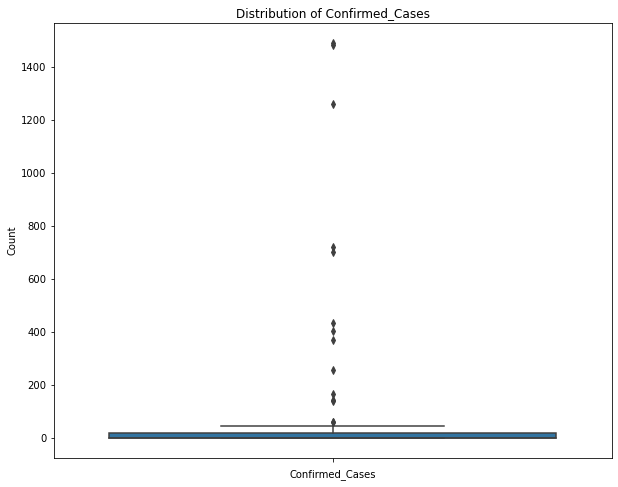

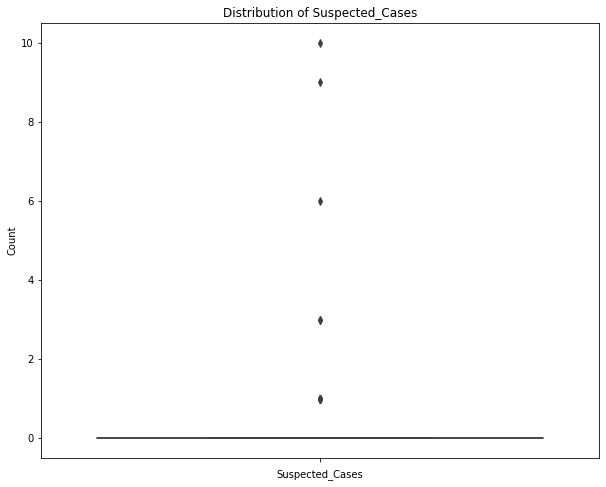

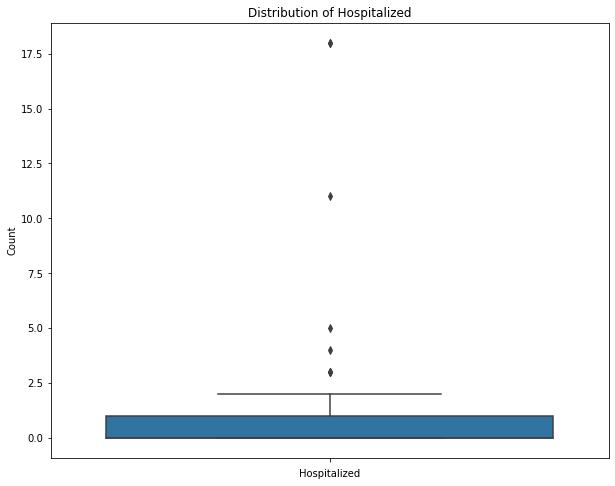

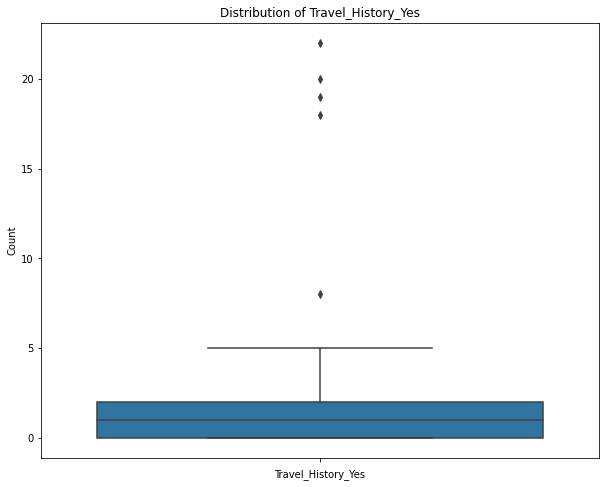

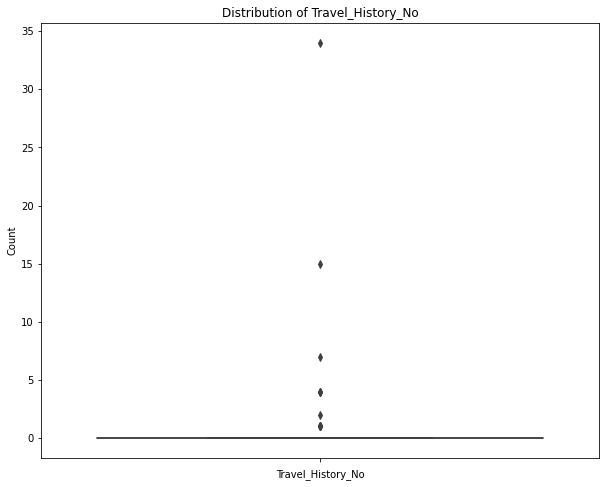

In [791]:
## Using a for loop to create the boxplot of various numerical attributes by calling the "outlier_func" function. 
for i in t:
    outlier_func(i)

In [792]:
## All the numerical attributes in the dataset have outliers. 
## The purpose of observing the outliers are to understand if the attributes have some uncommon and high value information in them.
## In certain situations we might need to remove such outliers depending upon the business needs.
## For this particular analysis we wont be removing the outliers as we need this high end projection as it might depict certain realistic observations.

## Univariate Analysis:-

In [793]:
def univariate_analysis(inp):
    plt.figure(figsize=[10,8])
    sns.displot(x=worldwide_cases[inp])
    plt.title("Distribution of {}".format(inp))
    plt.show()

<Figure size 720x576 with 0 Axes>

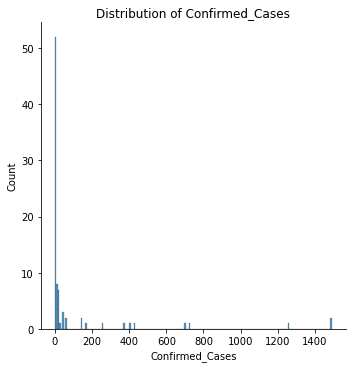

<Figure size 720x576 with 0 Axes>

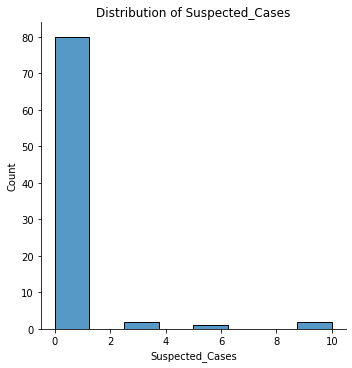

<Figure size 720x576 with 0 Axes>

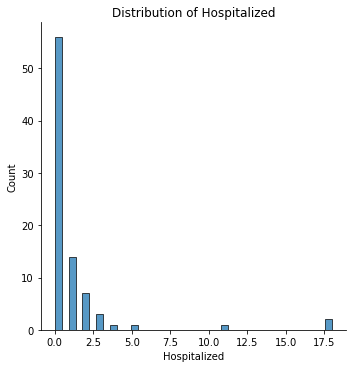

<Figure size 720x576 with 0 Axes>

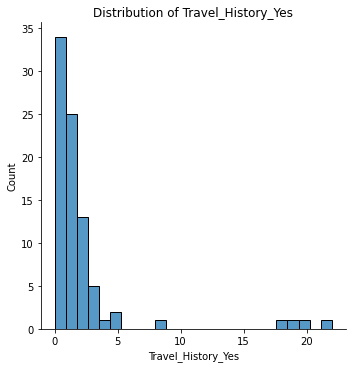

<Figure size 720x576 with 0 Axes>

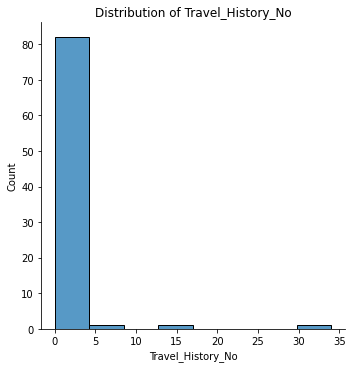

In [794]:
for i in t:
    univariate_analysis(i)

In [795]:
## Inference:-


## Bivariate Analysis:-

In [796]:
## Representig the entire "worldwide_cases" dataframe in the form of a map.
## https://plotly.github.io/plotly.py-docs/generated/plotly.express.choropleth.html (for reference)
def plot_map(df,col):
    df = df[df[col]>0]
    fig = px.choropleth(df, locations="Country", locationmode='country names', 
                  color=col, hover_name="Country",
                  title=col, hover_data=[col], height=700,width=1000, color_continuous_scale="Viridis")
    fig.show()

In [797]:
plot_map(worldwide_cases, 'Confirmed_Cases')

In [798]:
worldwide_data = worldwide_cases.copy()

In [799]:
## Here we will conver the data in the "Country" attribute which is an obejct type to numerical type so that further analysis could take place.
label_encoder = preprocessing.LabelEncoder()
worldwide_data['Country']= label_encoder.fit_transform(worldwide_data['Country'])

In [800]:
worldwide_data.head()

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
0,21,1482.0,0.0,5.0,2.0,7.0
1,60,433.0,0.0,0.0,0.0,34.0
2,71,1258.0,0.0,11.0,2.0,0.0
3,80,700.0,0.0,4.0,22.0,4.0
4,11,370.0,9.0,1.0,2.0,0.0


In [801]:
worldwide_data["Country"].unique()

array([21, 60, 71, 80, 11, 73, 39, 25,  5,  1, 28, 52, 38, 74, 31,  2,  0,
       18, 50, 67, 63, 17, 79, 24, 83, 53, 72,  7, 36, 20, 47, 37, 49, 55,
       26, 76, 58,  8, 46, 33, 54, 57, 15, 30, 48, 32, 81, 42, 12, 41, 77,
        3, 29, 35, 34, 59,  4, 78, 10, 45, 82, 62, 27, 66, 44, 51, 13, 64,
       43, 70, 65, 69, 75, 14, 16,  9, 68, 84, 23,  6, 22, 61, 56, 19, 40])

In [802]:
worldwide_cases["Country"].unique()

array(['England', 'Portugal', 'Spain', 'United States', 'Canada',
       'Sweden', 'Italy', 'France', 'Belgium', 'Australia', 'Germany',
       'Netherlands', 'Israel', 'Switzerland', 'Greece', 'Austria',
       'Argentina', 'Denmark', 'Morocco', 'Slovenia', 'Scotland',
       'Czech Republic', 'United Arab Emirates', 'Finland', 'Wales',
       'Northern Ireland', 'Sudan', 'Bolivia', 'Iran', 'Ecuador', 'Malta',
       'Ireland', 'Mexico', 'Pakistan', 'French Guiana', 'Thailand',
       'Peru', 'Brazil', 'Malaysia', 'Hungary', 'Norway', 'Paraguay',
       'Costa Rica', 'Gibraltar', 'Mauritius', 'Haiti', 'Uruguay',
       'Latvia', 'Cayman Islands', 'Kosovo', 'Turkey', 'Bahamas', 'Ghana',
       'India', 'Iceland', 'Poland', 'Bangladesh', 'Uganda', 'Cambodia',
       'Malawi', 'Venezuela', 'Romania', 'Georgia', 'Slovakia',
       'Luxembourg', 'Nepal', 'Chile', 'Serbia', 'Lebanon', 'South Korea',
       'Singapore', 'South Africa', 'Taiwan', 'Colombia', 'Croatia',
       'Bulgaria', 'Som

### Finding out the top 10 affected Countries.

- Finding out the top 10 Countries in each of the feature present in the "worldwide_cases" dataframe and storing them in a different dataframes.

In [803]:
Highest_Confirmed_Cases= worldwide_cases.sort_values(by="Confirmed_Cases", ascending=False).reset_index()[:10]
Highest_Suspected_Cases= worldwide_cases.sort_values(by="Suspected_Cases", ascending=False).reset_index()[:10]
Highest_Hospitalized_Cases= worldwide_cases.sort_values(by="Hospitalized", ascending=False).reset_index()[:10]
Highest_Travel_History_Yes= worldwide_cases.sort_values(by="Travel_History_Yes", ascending=False).reset_index()[:10]
Highest_Travel_History_No= worldwide_cases.sort_values(by="Travel_History_No", ascending=False).reset_index()[:10]

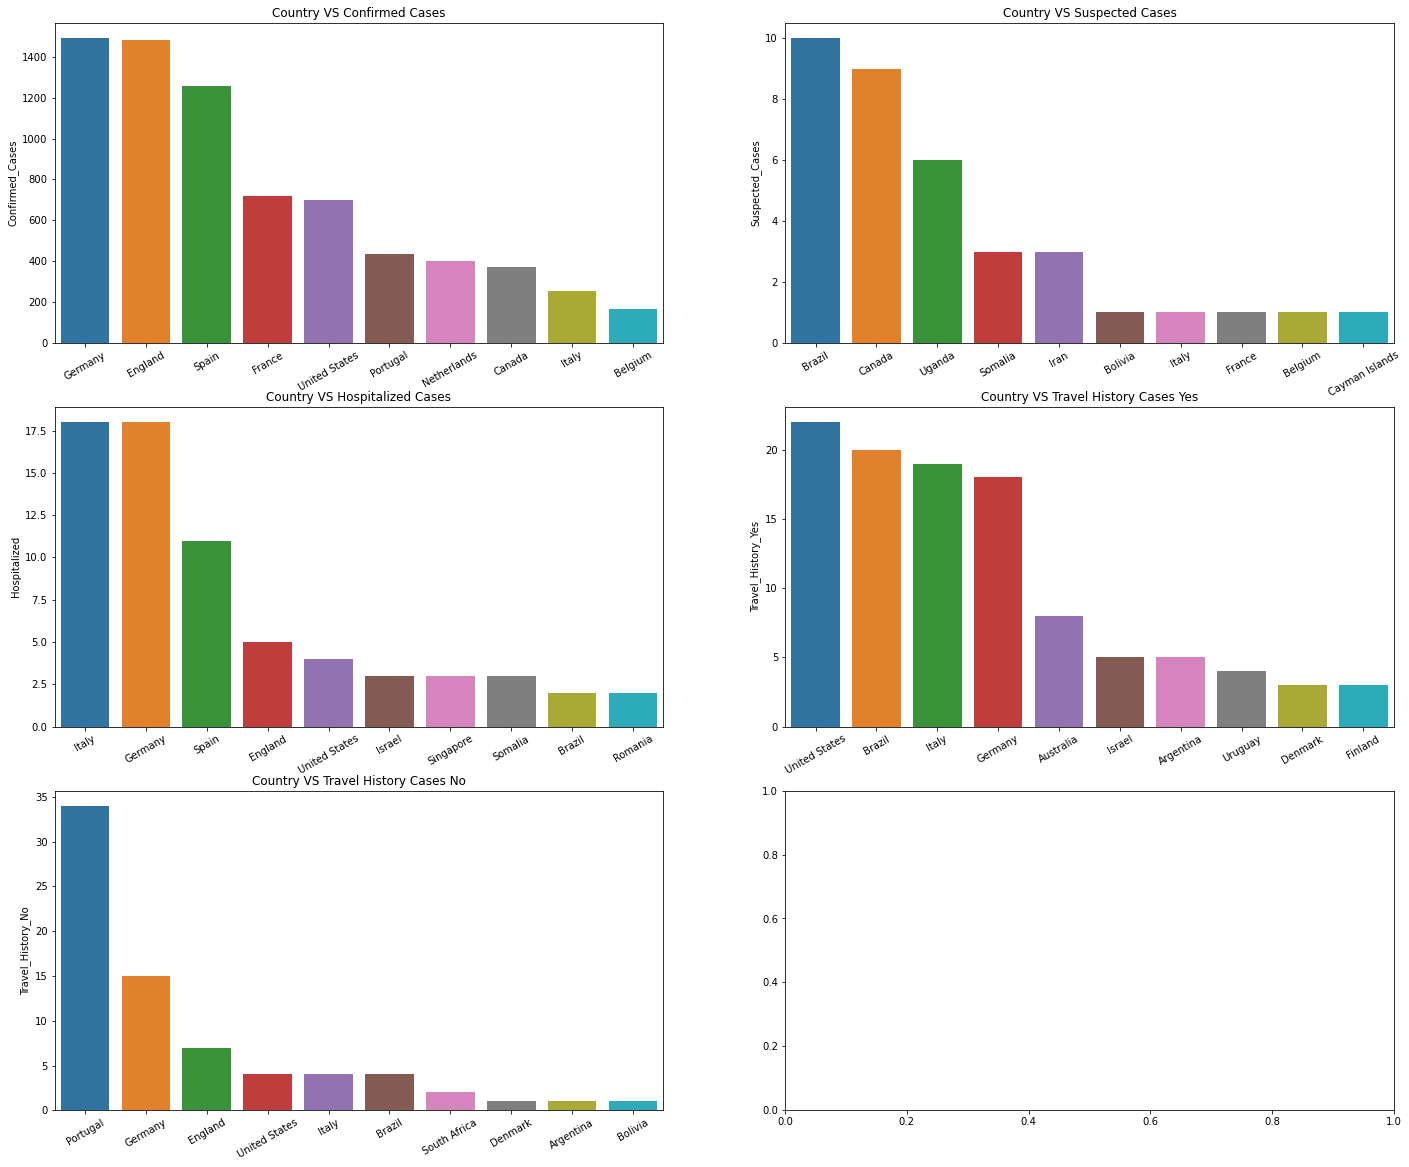

In [804]:
## Creating the 
ax=[]
labels=['Country VS Confirmed Cases','Country VS Suspected Cases','Country VS Hospitalized Cases','Country VS Travel History Cases Yes', 'Country VS Travel History Cases No']
fig,axes = plt.subplots(3,2,figsize=(24,20))
ax.append(sns.barplot(x=Highest_Confirmed_Cases.Country,y=Highest_Confirmed_Cases.Confirmed_Cases,ax=axes[0,0]))
ax.append(sns.barplot(x=Highest_Suspected_Cases.Country,y=Highest_Suspected_Cases.Suspected_Cases,ax=axes[0,1]))
ax.append(sns.barplot(x=Highest_Hospitalized_Cases.Country,y=Highest_Hospitalized_Cases.Hospitalized,ax=axes[1,0]))
ax.append(sns.barplot(x=Highest_Travel_History_Yes.Country,y=Highest_Travel_History_Yes.Travel_History_Yes,ax=axes[1,1]))
ax.append(sns.barplot(x=Highest_Travel_History_No.Country,y=Highest_Travel_History_No.Travel_History_No,ax=axes[2,0]))

for i in range(5):
    for item in ax[i].get_xticklabels():
        item.set_rotation(30)
#       ax[i].bar_label(ax[i].containers[0])
        ax[i].set_title(labels[i])
        ax[i].set(xlabel=None)

#### Inference:-

From the above analysis we can reach observe the following:-
    
- In the first barplot representation "Country vs Confirmed Cases" we can observe the top 10 Countries with the highest number of Confirmed Cases(Monkey Pox affected). We can observe that out of all the countries Germany has the highest count in affected cases.


- In the barplot representation of "Country vs Suspected Cases" we can observe that "Brazil" has the highest number of Suspected Cases, followed by "Canada", "Uganda" the other top counties in the top 10 list.


- In the barplot representation of "Country vs Hospitalized Cases" we can observe that "Italy" has the highest number of Hospitalized Cases, followed by "Germany", "Spain" the other top counties in the top 10 list. 


- In the barplot representation of "Country vs Travel History Yes" we can observe that "United States" has the highest number of citizens who travelled, followed by "Brazil", "Italy" the other counties in the top 10 list.


- In the barplot representation of "Country vs Travel History No" we can observe that "Portugal" has the highest number of citizens who didnot travel, followed by "Germany", "England" the other counties in the top 10 list.

Some other interesting observations that we can observe on correlating the plots are:-

- "Germany" has the highest number of Confirmed cases, yet it is not in the list of the top 10 Suspected or Hospatilized and not even Travel History cases which is a bit uncommon, implying that the country needs to focus on finding out what can be other means of the spread of the disease. Also if we check the 2nd highest Country with most number of Suspected Cases that is "England" we find some intresting facts like it is not within top 10 list of countries with highest number of Suspected cases nor the country with high Travel History, the only form of information that talies with the outcome is that the country has a very high rate of Hospitalized Cases.


- We can also observe that the Coutry "Canada" has the one of the highest number of Suspected Cases yet if we comapre it with the list of Confirmed cases then it stands at the 8th position which gives a positve sign implying that with accurate precaution and care the disease can be avoided from becoming fatal and proactive.


- On further analysis we can observe "Spain" being the 3rd Country with most number of confimed cases along with the Hospatilized cases, yet it doesnt come under the top 10 countires with higest number of Suspected cases which means the country needs to scale up its medical support to carry forward the necessary test so that the country can indentify the number of people being affected hence giving the general population to ensure safety measures if the disease is in the early satge.


- "United States" has the highest number people with Travel History yet it does not fall into the top 10 list of Countires with highest number of Confirmed Cases or Suspected Cases or even Hospitalized cases.

- We can also observe "Portugal" being the country with least number of travellers yet still falls in the list of top 10 countries with highest number of confirmed cases. Suggesting that there can be internal factors within the country which is resulting in the spread of the disease.

# Working on the "detected_cases" dataframe.

In [805]:
## Reviewing the dataframe for better understanding and reference.
detected_cases.head()

,Date_confirmation,Country,City,Age,Gender,Symptoms,Hospitalised (Y/N/NA),Isolated (Y/N/NA),Travel_history (Y/N/NA)
0,2022-05-06,England,London,NaN,NaN,rash,Y,Y,Y
1,2022-05-12,England,London,NaN,NaN,rash,Y,Y,N
2,2022-05-13,England,London,NaN,NaN,vesicular rash,N,Y,N
3,2022-05-15,England,London,NaN,male,vesicular rash,Y,Y,N
5,2022-05-15,England,London,NaN,male,vesicular rash,NaN,Y,N


In [806]:
## Finding out the number of data/information(rows) and attributes/features(columns) available for the particular dataframe.
detected_cases.shape

(753, 9)

In [807]:
##
detected_cases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 753 entries, 0 to 8128
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Date_confirmation        753 non-null    object
 1   Country                  753 non-null    object
 2   City                     247 non-null    object
 3   Age                      256 non-null    object
 4   Gender                   309 non-null    object
 5   Symptoms                 55 non-null     object
 6   Hospitalised (Y/N/NA)    105 non-null    object
 7   Isolated (Y/N/NA)        173 non-null    object
 8   Travel_history (Y/N/NA)  172 non-null    object
dtypes: object(9)
memory usage: 58.8+ KB


In [808]:
## Checking the number of null values
detected_cases.isnull().sum()

Date_confirmation            0
Country                      0
City                       506
Age                        497
Gender                     444
Symptoms                   698
Hospitalised (Y/N/NA)      648
Isolated (Y/N/NA)          580
Travel_history (Y/N/NA)    581
dtype: int64

On observing the attributes/features, we can determine that the "City" and "Date_confirmation" columns are of not much use as they either very high number of null values or they dont have much use in the analysis. Hence, we can remove them.

We can also replace the "NaN" values with "none" for better perspective.

In [809]:
## Dropping the attributes "City" and "Date_confirmation" from the dataframe.
detected_cases.drop(['City','Date_confirmation'], axis=1,inplace = True)

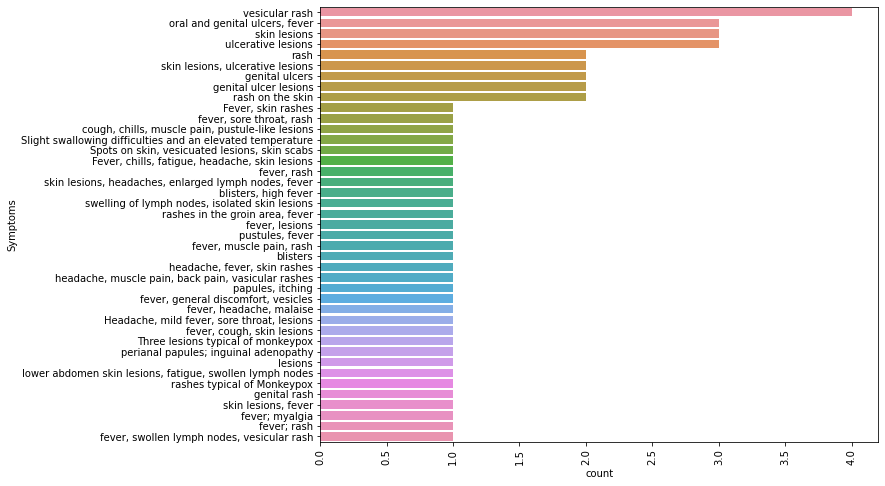

In [810]:
## The distribution of Symptoms is plotted before as if we replace the 'NaN' values or blank values later with 'NA' then its count will be highest in comparision to all other categories.
## Distribution of Symptoms using countplot.
plt.figure(figsize=(10,8))
sns.countplot(y='Symptoms', data=detected_cases, order  = detected_cases['Symptoms'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

In [811]:
for i in detected_cases.columns: 
    detected_cases[i] = detected_cases[i].fillna('NA') 

In [812]:
## Checking the dataset post removal of the above mentioned attributes.
detected_cases.head()

,Country,Age,Gender,Symptoms,Hospitalised (Y/N/NA),Isolated (Y/N/NA),Travel_history (Y/N/NA)
0,England,NA,NA,rash,Y,Y,Y
1,England,NA,NA,rash,Y,Y,N
2,England,NA,NA,vesicular rash,N,Y,N
3,England,NA,male,vesicular rash,Y,Y,N
5,England,NA,male,vesicular rash,NA,Y,N


In [813]:
## Here we will check the unqiue list of values present in each of the attribute.

In [814]:
detected_cases["Age"].unique()

array(['NA', '20-44', '25-29', '30-34', '40-44', '20-64', '20-59',
       '50-59', '40-49', '30-39', '35-39', '15-74', '30-59', '45-49',
       '55-59', '15-39', '30-50', '50-54', '20-24', '15-64', '25-49',
       '22-55', '40-45', '26-54', '30-54', '30-49', '20-29', '15-69',
       '40-42', '20-50', '45-50', '35-40', '50-55', '20-69', '20-62',
       '34-46', '20-39', '25-34', '35-44', '45-54', '55-64', '60-64',
       '5-14', '20-60', '19-24', '65-69', '23-46', '25-53'], dtype=object)

In [815]:
detected_cases["Gender"].unique()

array(['NA', 'male', 'female', 'male ', 'female '], dtype=object)

In [816]:
detected_cases["Symptoms"].unique()

array(['rash', 'vesicular rash', 'skin lesions, ulcerative lesions', 'NA',
       'ulcerative lesions',
       'Slight swallowing difficulties and an elevated temperature',
       'perianal papules; inguinal adenopathy', 'lesions',
       'genital ulcers', 'genital rash', 'fever, rash', 'skin lesions',
       'fever, lesions', 'fever, cough, skin lesions',
       'oral and genital ulcers, fever', 'blisters', 'pustules, fever',
       'blisters, high fever', 'genital ulcer lesions',
       'fever, muscle pain, rash',
       'Fever, chills, fatigue, headache, skin lesions',
       'Fever, skin rashes',
       'cough, chills, muscle pain, pustule-like lesions',
       'fever; myalgia', 'skin lesions, fever',
       'headache, muscle pain, back pain, vasicular rashes',
       'skin lesions, headaches, enlarged lymph nodes, fever',
       'rash on the skin',
       'Spots on skin, vesicuated lesions, skin scabs',
       'papules, itching', 'headache, fever, skin rashes', 'fever; rash',
    

In [817]:
detected_cases["Hospitalised (Y/N/NA)"].unique()

array(['Y', 'N', 'NA'], dtype=object)

In [818]:
detected_cases["Isolated (Y/N/NA)"].unique()

array(['Y', 'NA'], dtype=object)

In [819]:
detected_cases["Travel_history (Y/N/NA)"].unique()

array(['Y', 'N', 'NA'], dtype=object)

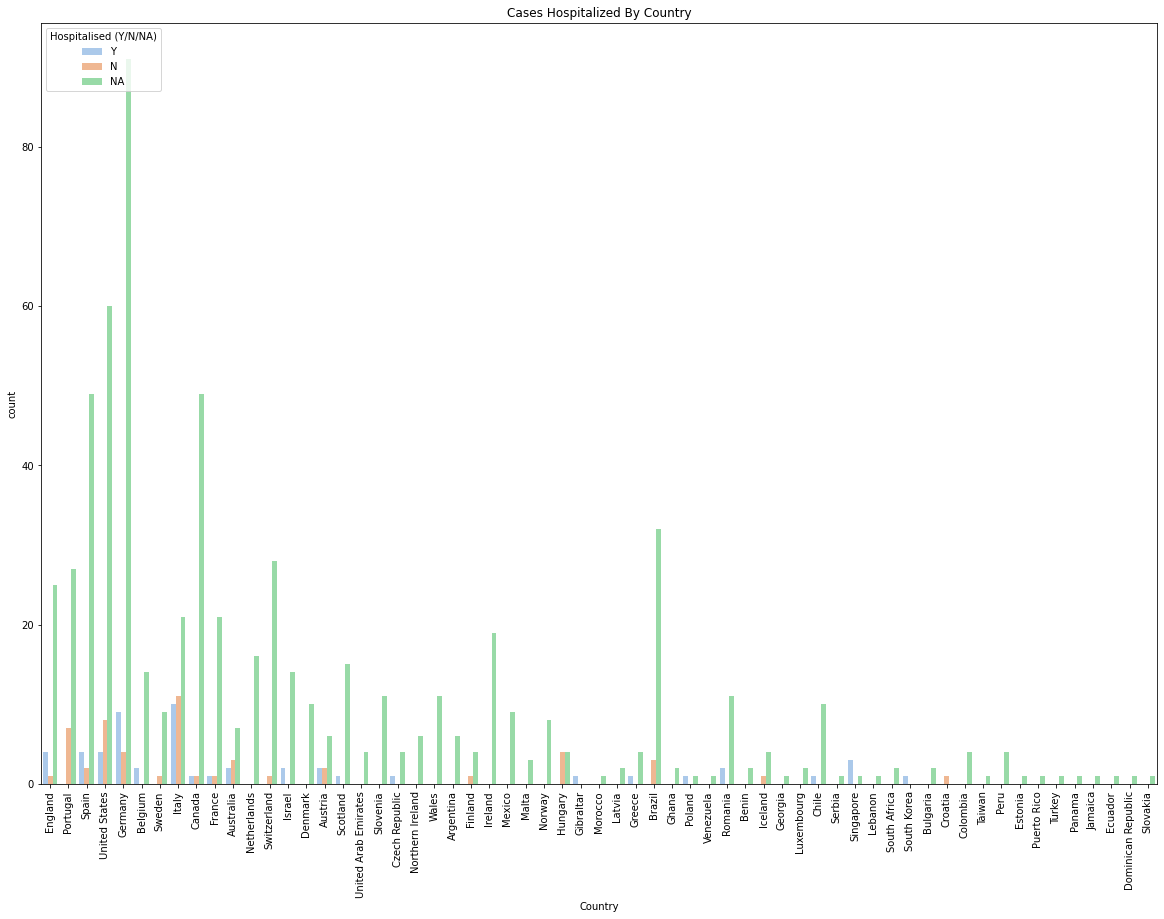

In [820]:
## Checking the distribution of Country w.r.t the "Hospitalized (Y/N/NA)":-
plt.figure(figsize = (20,14))
sns.countplot(x="Country", data=detected_cases, hue = "Hospitalised (Y/N/NA)",palette="pastel")
plt.xticks(rotation = 90)
plt.title("Cases Hospitalized By Country")
plt.show()

#### Inference:-

- Here we can see that Italy has the highest number of Hospitalized(Y) cases which is what we could see in the earlier.
- We can simillarly see the distribution of Hospitalized Cases in various countries like England, Spain and Germany which have high number of Hospitalized(Y) cases.

### In terms of Visualization and Preprocessing:-

- Nothing much can be feteched out of the "detected_cases" dataframe in terms of Visualization, as the count of 'NA' is the highest in all the attributes making the derivation of useful and relevant information inefficient.

In [821]:
print(f"No of Duplicates in the 'detected_cases' post analysis:- {detected_cases.duplicated().sum()}")

No of Duplicates in the 'detected_cases' post analysis:- 439


In [822]:
## Checking the duplicates.
detected_cases.drop_duplicates(subset=None, keep='first', inplace=True)

In [823]:
print(f"No of Duplicates in the 'detected_cases' post analysis:- {detected_cases.duplicated().sum()}")

No of Duplicates in the 'detected_cases' post analysis:- 0


In [824]:
detected_cases.head()

,Country,Age,Gender,Symptoms,Hospitalised (Y/N/NA),Isolated (Y/N/NA),Travel_history (Y/N/NA)
0,England,NA,NA,rash,Y,Y,Y
1,England,NA,NA,rash,Y,Y,N
2,England,NA,NA,vesicular rash,N,Y,N
3,England,NA,male,vesicular rash,Y,Y,N
5,England,NA,male,vesicular rash,NA,Y,N


In [825]:
monkey_pox_symptoms=[]
for i in detected_cases['Symptoms'].values:
    if i not in monkey_pox_symptoms:
        monkey_pox_symptoms.append(i)

In [826]:
#separating all the symptoms containing more than 1 symptom
def filter_it(monkey_pox_symptoms):
    filtered_symp=[]
    for i in monkey_pox_symptoms:
        if ',' in i:
            x = i.split(',')
            for j in x:
                filtered_symp.append(j)
        if ' and' in i:                       
            x = i.split('and')
            for j in x:
                filtered_symp.append(j)
        if ';' in i:                       
            x = i.split('; ')
            for j in x:
                filtered_symp.append(j) 
        if (',' not in i) and ('and' not in i) and (';' not in i):
            filtered_symp.append(i)
    return filtered_symp

filtered_symp = filter_it(monkey_pox_symptoms)
filtered_symp_statement=''
for i in filtered_symp:
    filtered_symp_statement+=i


In [827]:
from wordcloud import WordCloud, STOPWORDS

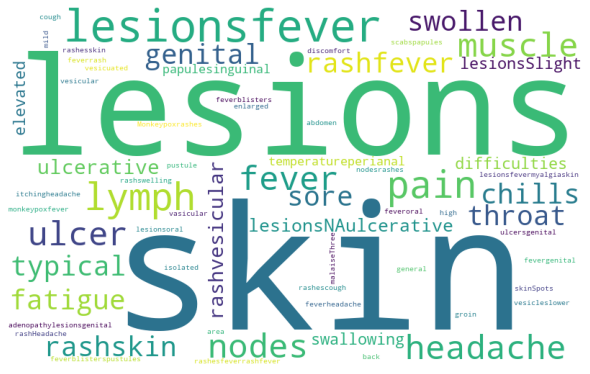

In [828]:
wordcloud = WordCloud(width = 800, height = 500,background_color ='white',min_font_size = 10).generate(filtered_symp_statement)

plt.figure(figsize = (8, 12), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

#### Inference:-
    
- From the above analysis we can see that most of the Symptoms incude Skin, muscle related issues some other issues include fever, ulcer,lesions and lymph as well.

In [829]:
## Here we will filter the above mentioned Symptoms further to understand the root cause better.

In [830]:
for i in range(len(filtered_symp)): # Removing the whitespaces in front and end of words.
    filtered_symp[i]=filtered_symp[i].strip()
filtered_symp_res=[]
for i in filtered_symp: # filtering more in detail
    if i not in filtered_symp_res:
        filtered_symp_res.append(i)

In [831]:
for i in range(len(filtered_symp_res)):  # filling the white space with _
    filtered_symp_res[i]=filtered_symp_res[i].replace(" ", "_")
filtered_symp_res

filtered_symp_res_statement=''
for i in filtered_symp_res:
    filtered_symp_res_statement= filtered_symp_res_statement+" "+ i

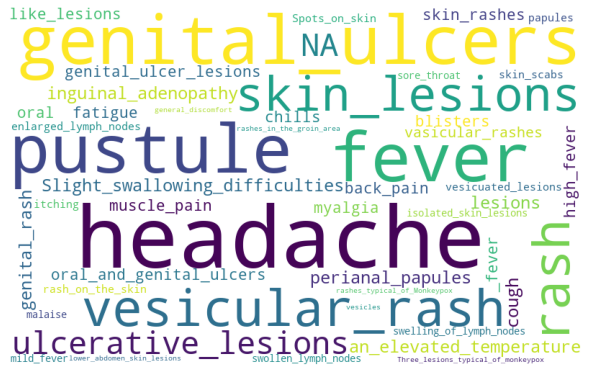

In [832]:
wordcloud = WordCloud(width = 800, height = 500,background_color ='white',min_font_size = 10).generate(filtered_symp_res_statement)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

#### Inference:-
    
- From the above analysis we have come to a better conclusion in terms of what are the exact factors of Symptons like "genital ulcers","vascular rash" and "pustule" are some of the most important ones among a lot others. 

### List of Symptoms which require earliest checkup in Hospital are as follows:-

In [833]:
symptoms_hospital = detected_cases[detected_cases['Hospitalised (Y/N/NA)']=='Y']['Symptoms']
symptoms_hospital

0                                                    rash
1                                                    rash
3                                          vesicular rash
6                                          vesicular rash
10                                                     NA
12                                                     NA
31      Slight swallowing difficulties and an elevated...
32                  perianal papules; inguinal adenopathy
34                                                lesions
57                                                     NA
63                                           genital rash
76                                                     NA
100                                                    NA
126                                          skin lesions
128                                        fever, lesions
138                            fever, cough, skin lesions
159                                                    NA
193           

In [834]:
#### Inference:-


In [835]:
after_filter=filter_it(symptoms_hospital)

for i in range(len(after_filter)): # Removing the whitespaces in front and end of words.
    after_filter[i]=after_filter[i].strip()
after_filter_plot = []
for i in after_filter:
    if i!='NA':
        after_filter_plot.append(i)

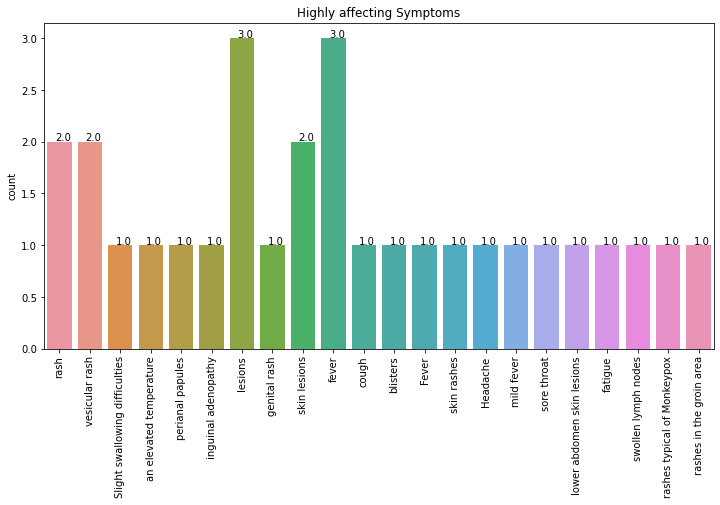

In [836]:
fig,axes = plt.subplots(figsize=(12,6))
ax = sns.countplot(x=after_filter_plot)
ax.set_title('Highly affecting Symptoms')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
for item in ax.get_xticklabels():
        item.set_rotation(90)

#### Inference:-

From the above analysis we can observe that the most highly affecting symptoms include the following:-

- Rashes which can be Vesicular rash and genital rash.
- Lession is another majour symptom which can be in the form of skin and lower abdomen skin.

### We will know validate the total count of population in terms of Male and Female who are affected by Monkey Pox.

In [837]:
## Checking the values Gender.
detected_cases['Gender'].unique()

array(['NA', 'male', 'female', 'male ', 'female '], dtype=object)

In [838]:
detected_cases['Gender'].replace('female ','female')

0         NA
1         NA
2         NA
3       male
5       male
        ... 
7603    male
7741      NA
7749    male
8055    male
8128    male
Name: Gender, Length: 314, dtype: object

In [839]:
detected_cases['Gender'].unique()

array(['NA', 'male', 'female', 'male ', 'female '], dtype=object)

In [840]:
## Replacing the Gender data with space to data without space at the end. 
## The reason for replacing them is that the model identifies 'male ' and 'male' differently becuase of a space at the end of the information.
for i in detected_cases.columns: 
    detected_cases[i] = detected_cases[i].replace('male ', 'male') 
    detected_cases[i] = detected_cases[i].replace('female ', 'female') 

In [841]:
detected_cases['Gender'].unique()

array(['NA', 'male', 'female'], dtype=object)

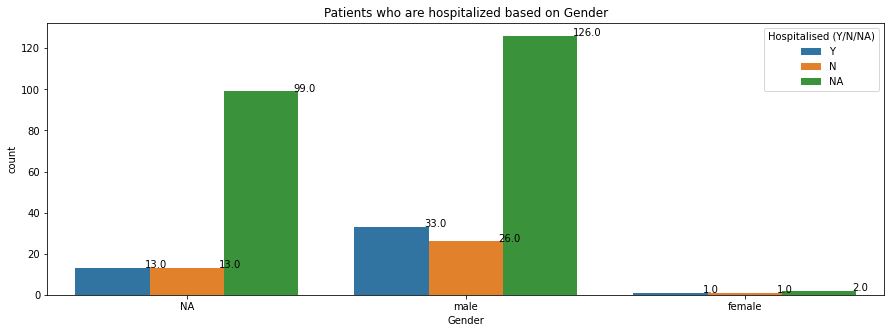

In [842]:
fig,axes = plt.subplots(figsize=(15,5))

ax = sns.countplot(x=detected_cases['Gender'],hue=detected_cases['Hospitalised (Y/N/NA)'])
ax.set_title('Patients who are hospitalized based on Gender')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

#### Inference:-

From the above analysis we can reach the following conclusions:-
- The male count is 185 in total out of which the number of males hospitalized are 33, the ones not hospitalized are 26 and then we have a total of 126 male patients whose information are not clear.


- We have record of 3 patients in each of the categories that is Hospitalized Yes(Y), No(N) and NA.


- Lastly we also have 125 patients whose Gender are unidentifiable and out of them we know 13 and hospitalized, 13 are not and a total of 99 individuals information are not identifiable as well.

### Now we will analyze what is the count of Hospitalized patients with travel history.

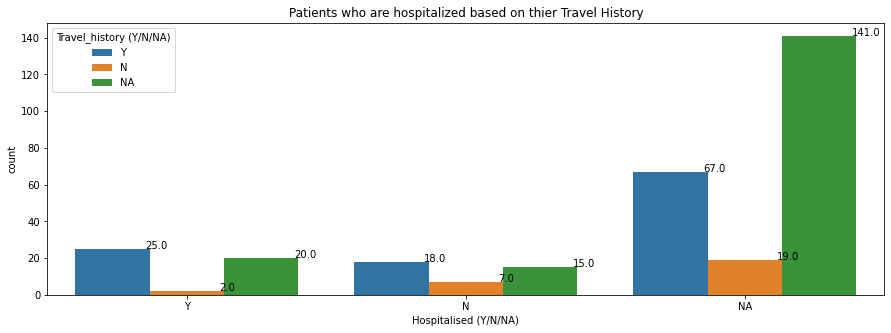

In [843]:
fig,axes = plt.subplots(figsize=(15,5))
ax = sns.countplot(x=detected_cases['Hospitalised (Y/N/NA)'],hue=detected_cases['Travel_history (Y/N/NA)'])
ax.set_title('Patients who are hospitalized based on thier Travel History')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

#### Inference:-

From the above analysis we can reach the following conclusions:-
- The total count of idividuals who are Hospitalized(Y/N/NA) and Travel have Travel history(Y/N/NA) are 314.


- Out of these the ones who are Hospitalized are 47.
     - Among this 25 have Travelled, 2 have not travelled and 20 have no exact information added about there travel history.
     
     
- Ones who are not hospitalized are 40.
     - Among this 18 have travelled, 7 have not and 15 donot have any exact information about there travel history.
     
     
- Lastly we have the unidetifiable lot which are marked as NA, it has a total count of 227 individual added.
     - Among this 67 have travelled, 19 have not and 141 have no travel information to be identifed in either of the categories.

# Working on the "confirmed_daily_cases" dataframe.

In [844]:
## reading the dataframe confirmed_daily_cases" to analize and understand the data.
confirmed_daily_cases.head(10)

,Country,2022-05-06,2022-05-12,2022-05-13,2022-05-15,2022-05-17,2022-05-18,2022-05-19,2022-05-20,2022-05-21,...,2022-06-29,2022-06-30,2022-07-01,2022-07-02,2022-07-03,2022-07-04,2022-07-05,2022-07-06,2022-07-07,2022-07-08
0,England,1,1,1,4,0,2,0,11,0,...,0,150,0,0,0,100,0,0,197,0
1,Portugal,0,0,0,0,3,11,9,0,0,...,18,11,18,0,0,0,13,0,0,0
2,Spain,0,0,0,0,0,7,0,23,10,...,0,396,0,0,0,62,0,0,0,0
3,United States,0,0,0,0,0,1,0,1,0,...,45,44,64,0,0,0,100,45,96,0
4,Germany,0,0,0,0,0,0,1,1,2,...,35,64,105,1,7,97,75,96,54,128
5,Belgium,0,0,0,0,0,0,1,2,1,...,0,0,0,0,0,0,51,0,0,0
6,Sweden,0,0,0,0,0,0,1,0,0,...,0,15,0,0,0,0,0,15,0,0
7,Italy,0,0,0,0,0,0,1,2,0,...,0,0,33,0,0,0,41,0,0,22
8,Canada,0,0,0,0,0,0,2,3,0,...,12,0,0,25,0,37,0,21,0,0
9,France,0,0,0,0,0,0,1,0,0,...,0,58,0,0,0,0,79,0,144,0


In [845]:
## Checking the number of rows and columns.
confirmed_daily_cases.shape

(61, 56)

In [846]:
## Checking the datatype of the attributes in the "confirmed_daily_cases" dataframe.
confirmed_daily_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 56 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Country     61 non-null     object
 1   2022-05-06  61 non-null     int64 
 2   2022-05-12  61 non-null     int64 
 3   2022-05-13  61 non-null     int64 
 4   2022-05-15  61 non-null     int64 
 5   2022-05-17  61 non-null     int64 
 6   2022-05-18  61 non-null     int64 
 7   2022-05-19  61 non-null     int64 
 8   2022-05-20  61 non-null     int64 
 9   2022-05-21  61 non-null     int64 
 10  2022-05-23  61 non-null     int64 
 11  2022-05-24  61 non-null     int64 
 12  2022-05-25  61 non-null     int64 
 13  2022-05-26  61 non-null     int64 
 14  2022-05-27  61 non-null     int64 
 15  2022-05-28  61 non-null     int64 
 16  2022-05-29  61 non-null     int64 
 17  2022-05-30  61 non-null     int64 
 18  2022-05-31  61 non-null     int64 
 19  2022-06-01  61 non-null     int64 
 20  2022-06-02  

### Time Series Analysis.

In [847]:
confirmed_daily_cases.head(16).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Country,England,Portugal,Spain,United States,Germany,Belgium,Sweden,Italy,Canada,France,Australia,Netherlands,Switzerland,Israel,Denmark,Austria
2022-05-06,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2022-05-12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2022-05-13,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2022-05-15,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2022-05-17,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2022-05-18,2,11,7,1,0,0,0,0,0,0,0,0,0,0,0,0
2022-05-19,0,9,0,0,1,1,1,1,2,1,0,0,0,0,0,0
2022-05-20,11,0,23,1,1,2,0,2,3,0,2,1,0,0,0,0
2022-05-21,0,0,10,0,2,1,0,0,0,0,0,1,1,1,0,0


In [848]:
confirmed_daily_cases.set_index('Country',inplace=True)
confirm_data = confirmed_daily_cases.T
confirm_data.head()

Country,England,Portugal,Spain,United States,Germany,Belgium,Sweden,Italy,Canada,France,...,Taiwan,Peru,Estonia,Puerto Rico,Turkey,Panama,Jamaica,Ecuador,Dominican Republic,Slovakia
2022-05-06,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-05-12,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-05-13,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-05-15,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-05-17,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [849]:
## Now we will take the sum of all the number of classes worldwide to a single columns with respect to the date.

In [850]:
confirm_data['Total Cases']=confirm_data.sum(axis=1)
confirm_data = pd.DataFrame(confirm_data['Total Cases'])

In [851]:
confirm_data.head(10)

,Total Cases
2022-05-06,1
2022-05-12,1
2022-05-13,1
2022-05-15,4
2022-05-17,3
2022-05-18,21
2022-05-19,16
2022-05-20,46
2022-05-21,16
2022-05-23,73


In [852]:
## Setting the Index to the date time format for further processing and analysis.
confirm_data.index = pd.to_datetime(confirm_data.index) 
confirm_data.index

DatetimeIndex(['2022-05-06', '2022-05-12', '2022-05-13', '2022-05-15',
               '2022-05-17', '2022-05-18', '2022-05-19', '2022-05-20',
               '2022-05-21', '2022-05-23', '2022-05-24', '2022-05-25',
               '2022-05-26', '2022-05-27', '2022-05-28', '2022-05-29',
               '2022-05-30', '2022-05-31', '2022-06-01', '2022-06-02',
               '2022-06-03', '2022-06-04', '2022-06-06', '2022-06-07',
               '2022-06-08', '2022-06-09', '2022-06-10', '2022-06-11',
               '2022-06-12', '2022-06-13', '2022-06-14', '2022-06-15',
               '2022-06-16', '2022-06-17', '2022-06-18', '2022-06-19',
               '2022-06-20', '2022-06-21', '2022-06-22', '2022-06-23',
               '2022-06-24', '2022-06-25', '2022-06-26', '2022-06-27',
               '2022-06-28', '2022-06-29', '2022-06-30', '2022-07-01',
               '2022-07-02', '2022-07-03', '2022-07-04', '2022-07-05',
               '2022-07-06', '2022-07-07', '2022-07-08'],
              dtype

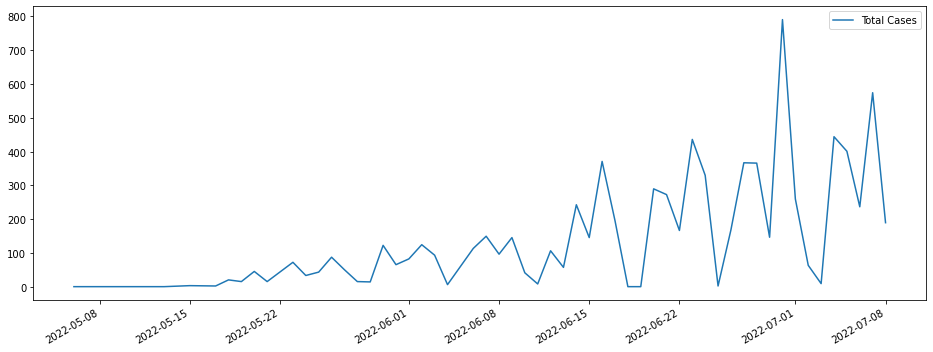

In [853]:
confirm_data.plot(figsize=(16, 6))
plt.show()

## Inference:-

- We can conclude that the time series is not stationary since it has seasonality present in it.
- Statastical test needs to be performed in order to prove that it is non-stationary.
- For this we can use Augmented Dickey-Fuller test.

#### How to implement Augmented Dickey-Fuller Test.

The Augmented Dickey-Fuller Test is used to determine if time-series data is stationary or not. We set a significance level before the test and make conclusions on the hypothesis based on the resulting p-value.

Null Hypothesis: The data is not stationary.

Alternative Hypothesis: The data is stationary.

In our case, for the data to be stationary (ie. reject the null hypothesis), the ADF test should have:

p-value <= significance level (0.05) If the p-value is greater than the significance level then we can say that it is likely that the data is not stationary.

In [854]:
passing_data=adfuller(confirm_data['Total Cases'])

def adf_test(cases):
    result=adfuller(cases)
    labels = ['Test parameters', 'p-value','#Lags Used','Dataset observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Dataset is stationary")
    else:
        print("Dataset is non-stationary ")

In [855]:
adf_test(confirm_data['Total Cases'])

Test parameters : -0.49862209519476486
p-value : 0.8922851051203081
#Lags Used : 6
Dataset observations : 48
Dataset is non-stationary 


### Inference:-

- We have different output values which describes the nature of the dataset. Yet, we are only interested in the p-value.


- The p-value is 0.8922851051203086 which is greater than 0.05. Hence the time-series is non-stationary.


- So now we need to make the Time-Series stationary using different approach.

### Now we will implement Differencing.

This approach is used to find the difference between the current day cases and the previous day cases in the time series.

Here, we will difference only once, therefore our d=1.

In [901]:
confirm_data['Differencing']=confirm_data['Total Cases']-confirm_data['Total Cases'].shift(20)
confirm_data.head(20)

,Total Cases,Differencing
2022-05-06,1,NaN
2022-05-12,1,NaN
2022-05-13,1,NaN
2022-05-15,4,NaN
2022-05-17,3,NaN
2022-05-18,21,NaN
2022-05-19,16,NaN
2022-05-20,46,NaN
2022-05-21,16,NaN
2022-05-23,73,NaN


In [902]:
adf_test(confirm_data['Differencing'].dropna())

Test parameters : -1.229418953720449
p-value : 0.660814149785864
#Lags Used : 6
Dataset observations : 28
Dataset is non-stationary 


In [888]:
#confirm_data['Differencing']=confirm_data['Total Cases']-confirm_data['Total Cases'].shift(2)
#confirm_data.head(20)

In [859]:
#adf_test(confirm_data['Differencing'].dropna())

In [860]:
#from pylab import rcParams
#import statsmodels.api as sm

#rcParams['figure.figsize'] = 16, 8
#decomposition = sm.tsa.seasonal_decompose(confirm_data, model='additive', period=7)
#fig = decomposition.plot()
#plt.show()

In [861]:
#p = d = q = range(0, 2)
#pdq = list(itertools.product(p, d, q))
#seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]
#print('Examples of parameter combinations for Seasonal ARIMA...')
#print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
#print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
#print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
#print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

In [862]:
#from statsmodels.tsa.stattools import adfuller
#dftest = adfuller(confirm_data, autolag = 'AIC')
#print("1. ADF : ",dftest[0])
#print("2. P-Value : ", dftest[1])
#print("3. Num Of Lags : ", dftest[2])
#print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
#print("5. Critical Values :")
#for key, val in dftest[4].items():
#    print("\t",key, ": ", val)

In [863]:
#from statsmodels.tsa.arima_model import ARIMA

#model = sm.tsa.arima.ARIMA(confirm_data, order=(1,1,1))
#result = model.fit()

In [864]:
#result.summary()

In [865]:
#mod = sm.tsa.statespace.SARIMAX(confirm_data,
#                                order=(0, 1, 1),
#                                seasonal_order=(1, 1, 1, 7),
#                                enforce_stationarity=False,
#                                enforce_invertibility=False)
#results = mod.fit(disp=0)

In [866]:
#pred = result.get_prediction(start=pd.to_datetime('2022-06-08'), dynamic=False)
#pred

In [867]:
## Prediction using SARIMA model.
#pred_ci = pred.conf_int()
#ax = confirm_data.plot(label='observed')
#pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
#ax.fill_between(pred_ci.index,
#                pred_ci.iloc[:, 0],
#                pred_ci.iloc[:, 1], color='k', alpha=.2)
#ax.set_xlabel('Date')
#ax.set_ylabel('Total Confirmed Cases')
#plt.legend()
#plt.show()